# Setup

In [1]:
# LOAD PACKAGES
using Pkg

In [2]:
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("FreqTables")
Pkg.add("HTTP")
Pkg.add("HypothesisTests")
Pkg.add("JLD")
Pkg.add("MLJBase")
Pkg.add("Missings")
Pkg.add("Plots")
Pkg.add("StatsKit") # meta-package that loads packages associated with JuliaStats, including CSV, DataFrames, GLM, HypothesisTests,
#and MultivariateStats
# note: unclear which packages loaded automatically; I used StatsKit without loading CSV directly, and then CSV not available
Pkg.add("StatsPlots")

   Updating registry at `/srv/julia/pkg/registries/General`
  Resolving package versions...
  Installed DataValueInterfaces ───────── v1.0.0
  Installed PooledArrays ──────────────── v0.5.3
  Installed IteratorInterfaceExtensions ─ v1.0.0
  Installed DataAPI ───────────────────── v1.4.0
  Installed TableTraits ───────────────── v1.0.0
  Installed SentinelArrays ────────────── v1.2.16
  Installed Tables ────────────────────── v1.2.2
  Installed CSV ───────────────────────── v0.8.2
Updating `~/Project.toml`
  [336ed68f] + CSV v0.8.2
Updating `~/Manifest.toml`
  [336ed68f] + CSV v0.8.2
  [9a962f9c] + DataAPI v1.4.0
  [e2d170a0] + DataValueInterfaces v1.0.0
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [69de0a69] + Parsers v1.0.15
  [2dfb63ee] + PooledArrays v0.5.3
  [91c51154] + SentinelArrays v1.2.16
  [3783bdb8] + TableTraits v1.0.0
  [bd369af6] + Tables v1.2.2
  [2a0f44e3] + Base64
  [ade2ca70] + Dates
  [8ba89e20] + Distributed
  [b77e0a4c] + InteractiveUtils
  [8f399da3] + Libd

In [3]:
## Open installed packages
using CSV, DataFrames, FreqTables, HTTP, HypothesisTests, JLD, Missings, MLJBase, Plots, StatsKit, StatsPlots

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1278
┌ Info: Precompiling FreqTables [da1fdf0e-e0ff-5433-a45f-9bb5ff651cb1]
└ @ Base loading.jl:1278
┌ Info: Precompiling HTTP [cd3eb016-35fb-5094-929b-558a96fad6f3]
└ @ Base loading.jl:1278
┌ Info: Precompiling HypothesisTests [09f84164-cd44-5f33-b23f-e6b0d136a0d5]
└ @ Base loading.jl:1278
┌ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
└ @ Base loading.jl:1278
┌ Info: Precompiling MLJBase [a7f614a8-145f-11e9-1d2a-a57a1082229d]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling StatsKit [2cb19f9e-ec4d-5c53-8573-a4542a68d3f0]
└ @ Base loading.jl:1278
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278


In [4]:
# check julia version
VERSION

v"1.5.3"

# Set Directory Structure

In [5]:
pwd()

"/home/jovyan/code"

In [6]:
path = "/home/jovyan/"
cd(path)
# or cd("..")

In [7]:
pwd()

"/home/jovyan"

## Make Sub-directories

In [8]:
mkdir("./code")

LoadError: IOError: mkdir: file already exists (EEXIST)

In [9]:
mkdir("./data")

LoadError: IOError: mkdir: file already exists (EEXIST)

In [10]:
mkdir("./figures")

"./figures"

In [11]:
mkdir("./tables")

"./tables"

In [12]:
readdir()

13-element Array{String,1}:
 ".bash_logout"
 ".bashrc"
 ".cache"
 ".config"
 ".git"
 ".profile"
 "Manifest.toml"
 "Project.toml"
 "README.md"
 "code"
 "data"
 "figures"
 "tables"

# Load Data

In [13]:
# if loading from file in data folder (use CSV and DataFrame together)
df1 = CSV.read("./data/original/metoo_data.csv", DataFrame)

,id,senator_party,condition,pid7,pre_sexism_1
,Int64,String,Int64,String,String
1,1,Democrat,2,Strong Republican,Agree strongly
2,2,Republican,2,Not very strong Democrat,Disagree somewhat
3,3,Republican,2,Strong Democrat,Disagree strongly
4,4,Republican,1,Independent,Agree somewhat
5,5,Democrat,3,Strong Democrat,Disagree strongly
6,6,Republican,2,Lean Republican,Neither disagree nor agree
7,7,Republican,3,Strong Democrat,Neither disagree nor agree
8,8,Republican,3,Not very strong Republican,Agree strongly
9,9,Democrat,2,Not very strong Democrat,Disagree strongly


In [14]:
# can index within DataFrame
# e.g., 
# row = df1[1,:]

In [15]:
# inspect first 5 rows and first 3 cols
df1[1:5,1:3]

,id,senator_party,condition
,Int64,String,Int64
1,1,Democrat,2
2,2,Republican,2
3,3,Republican,2
4,4,Republican,1
5,5,Democrat,3


# Summary Statistics

In [16]:
describe(df1)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,id,1404.17,1,1404.5,2807
2,senator_party,,Democrat,,Republican
3,condition,2.00641,1,2.0,3
4,pid7,,Independent,,Strong Republican
5,pre_sexism_1,,Agree somewhat,,Neither disagree nor agree
6,pre_sexism_2,,Agree somewhat,,Neither disagree nor agree
7,pre_sexism_3,,Agree somewhat,,Neither disagree nor agree
8,pre_sexism_4,,Agree somewhat,,Neither disagree nor agree
9,pre_favorability,6.93158,0,7.0,10


# Data Processing

In [17]:
# create and transform new var condition2
df1.condition2 = ""

""

In [18]:
df1[(df1[:condition] .== 1),:condition2]="Jokes"
df1[(df1[:condition] .== 2),:condition2]="Assault"
df1[(df1[:condition] .== 3),:condition2]="Control"

"Control"

In [19]:
# check values
df1[1:5,:condition2]

5-element Array{String,1}:
 "Assault"
 "Assault"
 "Assault"
 "Jokes"
 "Control"

In [20]:
# make categorical
df1[:condition2] = CategoricalArray(df1[:condition2])

2806-element CategoricalArray{String,1,UInt32}:
 "Assault"
 "Assault"
 "Assault"
 "Jokes"
 "Control"
 "Assault"
 "Control"
 "Control"
 "Assault"
 "Control"
 "Control"
 "Jokes"
 "Jokes"
 ⋮
 "Jokes"
 "Assault"
 "Assault"
 "Control"
 "Assault"
 "Control"
 "Assault"
 "Jokes"
 "Assault"
 "Assault"
 "Control"
 "Jokes"

In [21]:
# check levels
levels(df1[:condition2])

3-element Array{String,1}:
 "Assault"
 "Control"
 "Jokes"

In [22]:
# reorder levels
levels!(df1[:condition2], ["Control", "Jokes", "Assault"])
# exclamation mark (!) after function replaces object in place

2806-element CategoricalArray{String,1,UInt32}:
 "Assault"
 "Assault"
 "Assault"
 "Jokes"
 "Control"
 "Assault"
 "Control"
 "Control"
 "Assault"
 "Control"
 "Control"
 "Jokes"
 "Jokes"
 ⋮
 "Jokes"
 "Assault"
 "Assault"
 "Control"
 "Assault"
 "Control"
 "Assault"
 "Jokes"
 "Assault"
 "Assault"
 "Control"
 "Jokes"

In [23]:
# recheck levels
levels(df1[:condition2])

3-element Array{String,1}:
 "Control"
 "Jokes"
 "Assault"

In [24]:
# create and transform new var pid3
# check tabulation (values)
freqtable(df1.pid7)

8-element Named Array{Int64,1}
Dim1                       │ 
───────────────────────────┼────
Independent                │ 631
Lean Democrat              │ 377
Lean Republican            │ 269
Not sure                   │  23
Not very strong Democrat   │ 359
Not very strong Republican │ 200
Strong Democrat            │ 629
Strong Republican          │ 318

In [25]:
df1.pid3 = ""
df1[(df1[:pid7] .== "Lean Democrat"),:pid3]="Democrat"
df1[(df1[:pid7] .== "Strong Democrat"),:pid3]="Democrat"
df1[(df1[:pid7] .== "Not very strong Democrat"),:pid3]="Democrat"

df1[(df1[:pid7] .== "Lean Republican"),:pid3]="Republican"
df1[(df1[:pid7] .== "Strong Republican"),:pid3]="Republican"
df1[(df1[:pid7] .== "Not very strong Republican"),:pid3]="Republican"

df1[(df1[:pid7] .== "Independent"),:pid3]="Independent"
df1[(df1[:pid7] .== "Not sure"),:pid3]="Independent"

# make categorical
df1[:pid3] = CategoricalArray(df1[:pid3])

2806-element CategoricalArray{String,1,UInt32}:
 "Republican"
 "Democrat"
 "Democrat"
 "Independent"
 "Democrat"
 "Republican"
 "Democrat"
 "Republican"
 "Democrat"
 "Democrat"
 "Democrat"
 "Democrat"
 "Independent"
 ⋮
 "Independent"
 "Democrat"
 "Republican"
 "Independent"
 "Republican"
 "Democrat"
 "Democrat"
 "Republican"
 "Republican"
 "Democrat"
 "Democrat"
 "Republican"

In [26]:
describe(df1)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,id,1404.17,1,1404.5,2807
2,senator_party,,Democrat,,Republican
3,condition,2.00641,1,2.0,3
4,pid7,,Independent,,Strong Republican
5,pre_sexism_1,,Agree somewhat,,Neither disagree nor agree
6,pre_sexism_2,,Agree somewhat,,Neither disagree nor agree
7,pre_sexism_3,,Agree somewhat,,Neither disagree nor agree
8,pre_sexism_4,,Agree somewhat,,Neither disagree nor agree
9,pre_favorability,6.93158,0,7.0,10


In [27]:
# recode: punishment 

# punishment 1
freqtable(df1.punishment_1)

6-element Named Array{Int64,1}
Dim1                       │ 
───────────────────────────┼────
Agree somewhat             │ 560
Agree strongly             │ 329
Disagree somewhat          │ 415
Disagree strongly          │ 276
Neither disagree nor agree │ 290
missing                    │ 936

In [28]:
# var contains 'missing', which will not process in ==/> kind of functions, so need to recode missing first as ""
df1.punishment_1b = df1.punishment_1
df1.punishment_1b = Missings.replace(df1.punishment_1b, "")

Missings.EachReplaceMissing{PooledArrays.PooledArray{Union{Missing, String},UInt32,1,Array{UInt32,1}},String}(Union{Missing, String}["Neither disagree nor agree", "Disagree somewhat", "Disagree strongly", "Neither disagree nor agree", missing, "Disagree somewhat", missing, missing, "Agree somewhat", missing  …  "Agree strongly", missing, "Disagree strongly", missing, "Disagree somewhat", "Agree strongly", "Agree strongly", "Neither disagree nor agree", missing, "Neither disagree nor agree"], "")

In [29]:
# recode: punishment 

# punishment 1
df1.needmoreevidence = 999
df1[(df1[:punishment_1b] .== "Agree strongly"),:needmoreevidence]=5
df1[(df1[:punishment_1b] .== "Agree somewhat"),:needmoreevidence]=4
df1[(df1[:punishment_1b] .== "Neither disagree nor agree"),:needmoreevidence]=3
df1[(df1[:punishment_1b] .== "Disagree somewhat"),:needmoreevidence]=2
df1[(df1[:punishment_1b] .== "Disagree strongly"),:needmoreevidence]=1

# now recode 999 as missing so future fxn will skip over
df1[:needmoreevidence] = recode(df1[:needmoreevidence], 999=>missing)

freqtable(df1.needmoreevidence, df1.punishment_1)

6×6 Named Array{Int64,2}
Dim1 ╲ Dim2 │             Agree somewhat  …                     missing
────────────┼──────────────────────────────────────────────────────────
1           │                          0  …                           0
2           │                          0                              0
3           │                          0                              0
4           │                        560                              0
5           │                          0                              0
missing     │                          0  …                         936

In [30]:
# punishment 2 (to 'apology')
freqtable(df1.punishment_2)

6-element Named Array{Int64,1}
Dim1                       │ 
───────────────────────────┼────
Agree somewhat             │ 352
Agree strongly             │ 258
Disagree somewhat          │ 360
Disagree strongly          │ 342
Neither disagree nor agree │ 558
missing                    │ 936

In [31]:
# var contains 'missing', which will not process in ==/> kind of functions, so need to recode missing first as ""
df1.punishment_2b = df1.punishment_2
df1.punishment_2b = Missings.replace(df1.punishment_2b, "")

df1.apology = 999
df1[(df1[:punishment_2b] .== "Agree strongly"),:apology]=5
df1[(df1[:punishment_2b] .== "Agree somewhat"),:apology]=4
df1[(df1[:punishment_2b] .== "Neither disagree nor agree"),:apology]=3
df1[(df1[:punishment_2b] .== "Disagree somewhat"),:apology]=2
df1[(df1[:punishment_2b] .== "Disagree strongly"),:apology]=1

# recode 999 as missing
df1[:apology] = recode(df1[:apology], 999=>missing)
freqtable(df1.apology, df1.punishment_2)

6×6 Named Array{Int64,2}
Dim1 ╲ Dim2 │             Agree somewhat  …                     missing
────────────┼──────────────────────────────────────────────────────────
1           │                          0  …                           0
2           │                          0                              0
3           │                          0                              0
4           │                        352                              0
5           │                          0                              0
missing     │                          0  …                         936

In [32]:
# punishment 3 (to 'longtimeago')
freqtable(df1.punishment_3)

6-element Named Array{Int64,1}
Dim1                       │ 
───────────────────────────┼────
Agree somewhat             │ 395
Agree strongly             │ 243
Disagree somewhat          │ 372
Disagree strongly          │ 570
Neither disagree nor agree │ 290
missing                    │ 936

In [33]:
# var contains 'missing', which will not process in ==/> kind of functions, so need to recode missing first as ""
df1.punishment_3b = df1.punishment_3
df1.punishment_3b = Missings.replace(df1.punishment_3b, "")

df1.longtimeago = 999
df1[(df1[:punishment_3b] .== "Agree strongly"),:longtimeago]=5
df1[(df1[:punishment_3b] .== "Agree somewhat"),:longtimeago]=4
df1[(df1[:punishment_3b] .== "Neither disagree nor agree"),:longtimeago]=3
df1[(df1[:punishment_3b] .== "Disagree somewhat"),:longtimeago]=2
df1[(df1[:punishment_3b] .== "Disagree strongly"),:longtimeago]=1

# recode 999 as missing
df1[:longtimeago] = recode(df1[:longtimeago], 999=>missing)
freqtable(df1.longtimeago, df1.punishment_3)

6×6 Named Array{Int64,2}
Dim1 ╲ Dim2 │             Agree somewhat  …                     missing
────────────┼──────────────────────────────────────────────────────────
1           │                          0  …                           0
2           │                          0                              0
3           │                          0                              0
4           │                        395                              0
5           │                          0                              0
missing     │                          0  …                         936

In [34]:
# punishment 4 (to 'resign')
freqtable(df1.punishment_4)

6-element Named Array{Int64,1}
Dim1                       │ 
───────────────────────────┼────
Agree somewhat             │ 219
Agree strongly             │ 172
Disagree somewhat          │ 393
Disagree strongly          │ 679
Neither disagree nor agree │ 407
missing                    │ 936

In [35]:
# var contains 'missing', which will not process in ==/> kind of functions, so need to recode missing first as ""
df1.punishment_4b = df1.punishment_4
df1.punishment_4b = Missings.replace(df1.punishment_4b, "")

df1.resign = 999
df1[(df1[:punishment_4b] .== "Agree strongly"),:resign]=5
df1[(df1[:punishment_4b] .== "Agree somewhat"),:resign]=4
df1[(df1[:punishment_4b] .== "Neither disagree nor agree"),:resign]=3
df1[(df1[:punishment_4b] .== "Disagree somewhat"),:resign]=2
df1[(df1[:punishment_4b] .== "Disagree strongly"),:resign]=1

# recode 999 as missing
df1[:resign] = recode(df1[:resign], 999=>missing)
freqtable(df1.resign, df1.punishment_4)

6×6 Named Array{Int64,2}
Dim1 ╲ Dim2 │             Agree somewhat  …                     missing
────────────┼──────────────────────────────────────────────────────────
1           │                          0  …                           0
2           │                          0                              0
3           │                          0                              0
4           │                        219                              0
5           │                          0                              0
missing     │                          0  …                         936

In [36]:
# punishment 5 (to 'elitecues')
freqtable(df1.punishment_5)

6-element Named Array{Int64,1}
Dim1                       │ 
───────────────────────────┼────
Agree somewhat             │ 360
Agree strongly             │ 170
Disagree somewhat          │ 360
Disagree strongly          │ 385
Neither disagree nor agree │ 595
missing                    │ 936

In [37]:
# var contains 'missing', which will not process in ==/> kind of functions, so need to recode missing first as ""
df1.punishment_5b = df1.punishment_5
df1.punishment_5b = Missings.replace(df1.punishment_5b, "")

df1.elitecues = 999
df1[(df1[:punishment_5b] .== "Agree strongly"),:elitecues]=5
df1[(df1[:punishment_5b] .== "Agree somewhat"),:elitecues]=4
df1[(df1[:punishment_5b] .== "Neither disagree nor agree"),:elitecues]=3
df1[(df1[:punishment_5b] .== "Disagree somewhat"),:elitecues]=2
df1[(df1[:punishment_5b] .== "Disagree strongly"),:elitecues]=1

# recode 999 as missing
df1[:elitecues] = recode(df1[:elitecues], 999=>missing)
freqtable(df1.elitecues, df1.punishment_5)

6×6 Named Array{Int64,2}
Dim1 ╲ Dim2 │             Agree somewhat  …                     missing
────────────┼──────────────────────────────────────────────────────────
1           │                          0  …                           0
2           │                          0                              0
3           │                          0                              0
4           │                        360                              0
5           │                          0                              0
missing     │                          0  …                         936

In [38]:
#############################
# recode punishment: reverse codes
#############################

# need more evidence
df1.needmoreevidence_reverse = 999
df1[(df1[:punishment_1b] .== "Agree strongly"),:needmoreevidence_reverse]=1
df1[(df1[:punishment_1b] .== "Agree somewhat"),:needmoreevidence_reverse]=2
df1[(df1[:punishment_1b] .== "Neither disagree nor agree"),:needmoreevidence_reverse]=3
df1[(df1[:punishment_1b] .== "Disagree somewhat"),:needmoreevidence_reverse]=4
df1[(df1[:punishment_1b] .== "Disagree strongly"),:needmoreevidence_reverse]=5

# now recode 999 as missing so future fxn will skip over
df1[:needmoreevidence_reverse] = recode(df1[:needmoreevidence_reverse], 999=>missing)

freqtable(df1.needmoreevidence_reverse, df1.punishment_1)

6×6 Named Array{Int64,2}
Dim1 ╲ Dim2 │             Agree somewhat  …                     missing
────────────┼──────────────────────────────────────────────────────────
1           │                          0  …                           0
2           │                        560                              0
3           │                          0                              0
4           │                          0                              0
5           │                          0                              0
missing     │                          0  …                         936

In [39]:
# long time ago
df1.longtimeago_reverse = 999
df1[(df1[:punishment_3b] .== "Agree strongly"),:longtimeago_reverse]=1
df1[(df1[:punishment_3b] .== "Agree somewhat"),:longtimeago_reverse]=2
df1[(df1[:punishment_3b] .== "Neither disagree nor agree"),:longtimeago_reverse]=3
df1[(df1[:punishment_3b] .== "Disagree somewhat"),:longtimeago_reverse]=4
df1[(df1[:punishment_3b] .== "Disagree strongly"),:longtimeago_reverse]=5

# recode 999 as missing
df1[:longtimeago_reverse] = recode(df1[:longtimeago_reverse], 999=>missing)
freqtable(df1.longtimeago_reverse, df1.punishment_3)

6×6 Named Array{Int64,2}
Dim1 ╲ Dim2 │             Agree somewhat  …                     missing
────────────┼──────────────────────────────────────────────────────────
1           │                          0  …                           0
2           │                        395                              0
3           │                          0                              0
4           │                          0                              0
5           │                          0                              0
missing     │                          0  …                         936

In [40]:
# new variable: mean punitiveness score ####
df1[:meanpunishment] = ((df1[:apology]+df1[:resign]+df1[:needmoreevidence_reverse]+df1[:longtimeago_reverse])/4)

2806-element Array{Union{Missing, Float64},1}:
 3.25
 3.75
 5.0
 3.0
  missing
 3.5
  missing
  missing
 2.25
  missing
  missing
 3.75
 3.25
 ⋮
 1.75
 3.5
 1.5
  missing
 5.0
  missing
 3.25
 2.0
 1.0
 3.5
  missing
 3.0

In [41]:
describe(df1.meanpunishment)

Summary Stats:
Length:         2806
Missing Count:  936
Mean:           2.868449
Minimum:        1.000000
1st Quartile:   2.000000
Median:         3.000000
3rd Quartile:   3.500000
Maximum:        5.000000
Type:           Union{Missing, Float64}


In [42]:
## new variable: same party as legislator####
freqtable(df1.senator_party, df1.senator_party)

2×2 Named Array{Int64,2}
Dim1 ╲ Dim2 │   Democrat  Republican
────────────┼───────────────────────
Democrat    │       1407           0
Republican  │          0        1399

In [43]:
df1.sameparty = ""
df1[( (df1[:pid3] .== "Democrat") .& (df1[:senator_party] .== "Democrat") ) .|
    ( (df1[:pid3] .== "Republican") .& (df1[:senator_party] .== "Republican") ),:sameparty] ="Same party"

df1[( (df1[:pid3] .== "Democrat") .& (df1[:senator_party] .== "Republican") ) .|
    ( (df1[:pid3] .== "Republican") .& (df1[:senator_party] .== "Democrat") ),:sameparty] ="Opposite party"

df1[(df1[:pid3] .== "Independent"),:sameparty] = "Independents/Not sures" 

#make categorical
df1[:sameparty] = CategoricalArray(df1[:sameparty])

2806-element CategoricalArray{String,1,UInt32}:
 "Opposite party"
 "Opposite party"
 "Opposite party"
 "Independents/Not sures"
 "Same party"
 "Same party"
 "Opposite party"
 "Same party"
 "Same party"
 "Same party"
 "Opposite party"
 "Opposite party"
 "Independents/Not sures"
 ⋮
 "Independents/Not sures"
 "Opposite party"
 "Same party"
 "Independents/Not sures"
 "Same party"
 "Opposite party"
 "Same party"
 "Opposite party"
 "Same party"
 "Opposite party"
 "Opposite party"
 "Same party"

In [44]:
freqtable(df1.sameparty)

3-element Named Array{Int64,1}
Dim1                                                     │ 
─────────────────────────────────────────────────────────┼─────
CategoricalValue{String,UInt32} "Independents/Not sures" │  654
CategoricalValue{String,UInt32} "Opposite party"         │ 1088
CategoricalValue{String,UInt32} "Same party"             │ 1064

In [45]:
# recode: pre sexism ####
# sexism_1,2,4 reverse coded
# see original R code from authors

# tried using recode and dictionaries, but could not get it to work
# instead, generated simple numeric based on values of pre_sexism_#

#df1.pre_sexism_1new = recode(df1.pre_sexism_1, 
#    5=>"Agree strongly",
#    4=>"Agree somewhat",
#    3=>"Neither disagree nor agree",
#    2=>"Disagree somewhat",
#    1=>"Disagree strongly")

# alt: could use dictionary: A = Categorical([1 2;2 1;2 2;1 1], Dict(1=>"male", 2=>"female"))

df1.pre_sexism_1new = 999
df1[ (df1[:pre_sexism_1] .== "Agree strongly"),:pre_sexism_1new] =5
df1[ (df1[:pre_sexism_1] .== "Agree somewhat"),:pre_sexism_1new] =4
df1[ (df1[:pre_sexism_1] .== "Neither disagree nor agree"),:pre_sexism_1new] =3
df1[ (df1[:pre_sexism_1] .== "Disagree somewhat"),:pre_sexism_1new] =2
df1[ (df1[:pre_sexism_1] .== "Disagree strongly"),:pre_sexism_1new] =1
freqtable(df1.pre_sexism_1new)

5-element Named Array{Int64,1}
Dim1  │ 
──────┼────
1     │ 905
2     │ 793
3     │ 459
4     │ 493
5     │ 156

In [46]:
df1.pre_sexism_2new = 999
df1[ (df1[:pre_sexism_2] .== "Agree strongly"),:pre_sexism_2new] =5
df1[ (df1[:pre_sexism_2] .== "Agree somewhat"),:pre_sexism_2new] =4
df1[ (df1[:pre_sexism_2] .== "Neither disagree nor agree"),:pre_sexism_2new] =3
df1[ (df1[:pre_sexism_2] .== "Disagree somewhat"),:pre_sexism_2new] =2
df1[ (df1[:pre_sexism_2] .== "Disagree strongly"),:pre_sexism_2new] =1
freqtable(df1.pre_sexism_2new)

5-element Named Array{Int64,1}
Dim1  │ 
──────┼────
1     │ 919
2     │ 661
3     │ 437
4     │ 556
5     │ 233

In [47]:
df1.pre_sexism_4new = 999
df1[ (df1[:pre_sexism_4] .== "Agree strongly"),:pre_sexism_4new] =5
df1[ (df1[:pre_sexism_4] .== "Agree somewhat"),:pre_sexism_4new] =4
df1[ (df1[:pre_sexism_4] .== "Neither disagree nor agree"),:pre_sexism_4new] =3
df1[ (df1[:pre_sexism_4] .== "Disagree somewhat"),:pre_sexism_4new] =2
df1[ (df1[:pre_sexism_4] .== "Disagree strongly"),:pre_sexism_4new] =1
freqtable(df1.pre_sexism_4new)

5-element Named Array{Int64,1}
Dim1  │ 
──────┼────
1     │ 940
2     │ 684
3     │ 445
4     │ 552
5     │ 185

In [48]:
df1.pre_sexism_3new = 999
df1[ (df1[:pre_sexism_3] .== "Agree strongly"),:pre_sexism_3new] =1
df1[ (df1[:pre_sexism_3] .== "Agree somewhat"),:pre_sexism_3new] =2
df1[ (df1[:pre_sexism_3] .== "Neither disagree nor agree"),:pre_sexism_3new] =3
df1[ (df1[:pre_sexism_3] .== "Disagree somewhat"),:pre_sexism_3new] =4
df1[ (df1[:pre_sexism_3] .== "Disagree strongly"),:pre_sexism_3new] =5
freqtable(df1.pre_sexism_3new)

5-element Named Array{Int64,1}
Dim1  │ 
──────┼────
1     │ 925
2     │ 825
3     │ 504
4     │ 339
5     │ 213

In [49]:
# new variable: pre_sexism ####
df1[:pre_sexism] = ((df1[:pre_sexism_1new] + df1[:pre_sexism_2new] + df1[:pre_sexism_3new] + df1[:pre_sexism_4new])/4)

2806-element Array{Float64,1}:
 3.75
 2.75
 2.0
 3.25
 1.0
 3.0
 3.0
 4.0
 1.0
 1.5
 2.0
 4.25
 3.0
 ⋮
 3.75
 1.5
 2.5
 2.25
 1.0
 1.0
 1.75
 4.0
 3.0
 3.5
 1.0
 3.0

In [50]:
# recode post_sexism
# sexism_1,2,4 reverse coded (same as pre_sexism)
# see original R code from authors

df1.post_sexism_1new = 999
df1[ (df1[:post_sexism_1] .== "Agree strongly"),:post_sexism_1new] =5
df1[ (df1[:post_sexism_1] .== "Agree somewhat"),:post_sexism_1new] =4
df1[ (df1[:post_sexism_1] .== "Neither disagree nor agree"),:post_sexism_1new] =3
df1[ (df1[:post_sexism_1] .== "Disagree somewhat"),:post_sexism_1new] =2
df1[ (df1[:post_sexism_1] .== "Disagree strongly"),:post_sexism_1new] =1

df1.post_sexism_2new = 999
df1[ (df1[:post_sexism_2] .== "Agree strongly"),:post_sexism_2new] =5
df1[ (df1[:post_sexism_2] .== "Agree somewhat"),:post_sexism_2new] =4
df1[ (df1[:post_sexism_2] .== "Neither disagree nor agree"),:post_sexism_2new] =3
df1[ (df1[:post_sexism_2] .== "Disagree somewhat"),:post_sexism_2new] =2
df1[ (df1[:post_sexism_2] .== "Disagree strongly"),:post_sexism_2new] =1

df1.post_sexism_4new = 999
df1[ (df1[:post_sexism_4] .== "Agree strongly"),:post_sexism_4new] =5
df1[ (df1[:post_sexism_4] .== "Agree somewhat"),:post_sexism_4new] =4
df1[ (df1[:post_sexism_4] .== "Neither disagree nor agree"),:post_sexism_4new] =3
df1[ (df1[:post_sexism_4] .== "Disagree somewhat"),:post_sexism_4new] =2
df1[ (df1[:post_sexism_4] .== "Disagree strongly"),:post_sexism_4new] =1

df1.post_sexism_3new = 999
df1[ (df1[:post_sexism_3] .== "Agree strongly"),:post_sexism_3new] =1
df1[ (df1[:post_sexism_3] .== "Agree somewhat"),:post_sexism_3new] =2
df1[ (df1[:post_sexism_3] .== "Neither disagree nor agree"),:post_sexism_3new] =3
df1[ (df1[:post_sexism_3] .== "Disagree somewhat"),:post_sexism_3new] =4
df1[ (df1[:post_sexism_3] .== "Disagree strongly"),:post_sexism_3new] =5

# new variable: post_sexism ####
df1[:post_sexism] = ((df1[:post_sexism_1new] + df1[:post_sexism_2new] + df1[:post_sexism_3new] + df1[:post_sexism_4new])/4)

2806-element Array{Float64,1}:
 2.0
 3.25
 1.75
 4.0
 1.0
 3.0
 3.25
 4.0
 1.0
 1.25
 2.0
 4.0
 3.75
 ⋮
 4.0
 1.0
 2.5
 2.25
 1.0
 1.0
 1.75
 5.0
 3.0
 3.25
 1.0
 3.0

In [51]:
### new variables: 
# raw change from pretest to posttest ####
# favorability
df1[:change_favorability] = (df1.post_favorability.+1) - (df1.pre_favorability.+1)

2806-element Array{Int64,1}:
  0
 -3
 -3
 -2
  1
 -1
 -1
  0
 -5
 -1
  0
 -2
  0
  ⋮
  1
 -2
  0
  1
 -9
  0
 -2
  3
 -1
 -2
  0
 -3

In [52]:
# vote
df1[:change_vote] = (df1.post_vote) - (df1.pre_vote)

2806-element Array{Int64,1}:
  4
 -1
  0
  1
  0
  0
  2
  0
 -4
 -2
  0
 -1
  0
  ⋮
  1
 -3
  0
  0
 -9
  1
 -2
  1
 -2
  1
  0
 -3

In [53]:
# sexism
df1[:change_sexism] = (df1.post_sexism) - (df1.pre_sexism)

2806-element Array{Float64,1}:
 -1.75
  0.5
 -0.25
  0.75
  0.0
  0.0
  0.25
  0.0
  0.0
 -0.25
  0.0
 -0.25
  0.75
  ⋮
  0.25
 -0.5
  0.0
  0.0
  0.0
  0.0
  0.0
  1.0
  0.0
 -0.25
  0.0
  0.0

In [54]:
### new variables: 
# percent change from pretest to posttest ##### favorability
df1[:perchange_favorability] = (((df1[:post_favorability].+1) - (df1[:pre_favorability].+1))./(df1[:pre_favorability].+1))*100

2806-element Array{Float64,1}:
   0.0
 -50.0
 -50.0
 -25.0
  14.285714285714285
 -12.5
 -12.5
   0.0
 -45.45454545454545
 -11.11111111111111
   0.0
 -50.0
   0.0
   ⋮
  16.666666666666664
 -25.0
   0.0
  10.0
 -90.0
   0.0
 -28.57142857142857
 150.0
 -12.5
 -22.22222222222222
   0.0
 -33.33333333333333

In [55]:
# vote
df1[:perchange_vote] = (((df1.post_vote.+1) - (df1.pre_vote.+1))./(df1.pre_vote.+1))*100

2806-element Array{Float64,1}:
 100.0
 -25.0
   0.0
  14.285714285714285
   0.0
   0.0
  28.57142857142857
   0.0
 -36.36363636363637
 -20.0
   0.0
 -33.33333333333333
   0.0
   ⋮
  14.285714285714285
 -50.0
   0.0
   0.0
 -90.0
  10.0
 -28.57142857142857
  33.33333333333333
 -18.181818181818183
  11.11111111111111
   0.0
 -37.5

In [56]:
# sexism
df1[:perchange_sexism] = (((df1[:post_sexism].+1) - (df1[:pre_sexism].+1))./(df1[:pre_sexism].+1))*100

2806-element Array{Float64,1}:
 -36.84210526315789
  13.333333333333334
  -8.333333333333332
  17.647058823529413
   0.0
   0.0
   6.25
   0.0
   0.0
 -10.0
   0.0
  -4.761904761904762
  18.75
   ⋮
   5.263157894736842
 -20.0
   0.0
   0.0
   0.0
   0.0
   0.0
  20.0
   0.0
  -5.555555555555555
   0.0
   0.0

In [57]:
# subset: without independents/notsures 
partydat = df1[(df1[:sameparty] .!= "Independents/Not sures"),:]

,id,senator_party,condition,pid7,pre_sexism_1
,Int64,String,Int64,String,String
1,1,Democrat,2,Strong Republican,Agree strongly
2,2,Republican,2,Not very strong Democrat,Disagree somewhat
3,3,Republican,2,Strong Democrat,Disagree strongly
4,5,Democrat,3,Strong Democrat,Disagree strongly
5,6,Republican,2,Lean Republican,Neither disagree nor agree
6,7,Republican,3,Strong Democrat,Neither disagree nor agree
7,8,Republican,3,Not very strong Republican,Agree strongly
8,9,Democrat,2,Not very strong Democrat,Disagree strongly
9,10,Democrat,3,Strong Democrat,Disagree strongly


In [58]:
# subset: people that share party with senator, people that do not share party with senator
samepartydat = df1[(df1[:sameparty] .!= "Same party"),:]
opppartydat = df1[(df1[:sameparty] .!= "Opposite party"),:]

,id,senator_party,condition,pid7,pre_sexism_1
,Int64,String,Int64,String,String
1,4,Republican,1,Independent,Agree somewhat
2,5,Democrat,3,Strong Democrat,Disagree strongly
3,6,Republican,2,Lean Republican,Neither disagree nor agree
4,8,Republican,3,Not very strong Republican,Agree strongly
5,9,Democrat,2,Not very strong Democrat,Disagree strongly
6,10,Democrat,3,Strong Democrat,Disagree strongly
7,13,Republican,1,Independent,Agree somewhat
8,14,Republican,1,Not very strong Republican,Agree somewhat
9,15,Republican,3,Lean Republican,Disagree somewhat


## Means and T-tests

In [59]:
# Means
describe(df1[:post_favorability][df1.condition2 .== "Control"])

Summary Stats:
Length:         936
Missing Count:  0
Mean:           7.112179
Minimum:        0.000000
1st Quartile:   6.000000
Median:         7.000000
3rd Quartile:   9.000000
Maximum:        10.000000
Type:           Int64


In [60]:
describe(df1[:post_favorability][df1.condition2 .== "Assault"])

Summary Stats:
Length:         952
Missing Count:  0
Mean:           4.388655
Minimum:        0.000000
1st Quartile:   2.000000
Median:         5.000000
3rd Quartile:   6.000000
Maximum:        10.000000
Type:           Int64


In [61]:
describe(df1[:post_favorability][df1.condition2 .== "Jokes"])

Summary Stats:
Length:         918
Missing Count:  0
Mean:           5.337691
Minimum:        0.000000
1st Quartile:   4.000000
Median:         5.000000
3rd Quartile:   7.000000
Maximum:        10.000000
Type:           Int64


In [62]:
describe(df1[:post_vote][df1.condition2 .== "Control"])

Summary Stats:
Length:         936
Missing Count:  0
Mean:           6.168803
Minimum:        0.000000
1st Quartile:   5.000000
Median:         7.000000
3rd Quartile:   8.000000
Maximum:        10.000000
Type:           Int64


In [63]:
describe(df1[:post_vote][df1.condition2 .== "Assault"])

Summary Stats:
Length:         952
Missing Count:  0
Mean:           4.012605
Minimum:        0.000000
1st Quartile:   1.000000
Median:         5.000000
3rd Quartile:   6.000000
Maximum:        10.000000
Type:           Int64


In [64]:
describe(df1[:post_vote][df1.condition2 .== "Jokes"])

Summary Stats:
Length:         918
Missing Count:  0
Mean:           4.847495
Minimum:        0.000000
1st Quartile:   2.000000
Median:         5.000000
3rd Quartile:   7.000000
Maximum:        10.000000
Type:           Int64


In [65]:
# t-tests
EqualVarianceTTest(df1[:post_favorability][df1.condition2 .== "Control"],
    df1[:post_favorability][df1.condition2 .== "Assault"])
# shows mean difference of 2.7 (same as on p3 of publication), and p<0.001

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          2.72352
    95% confidence interval: (2.5034, 2.9437)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   [936,952]
    t-statistic:              24.26329139391319
    degrees of freedom:       1886
    empirical standard error: 0.11224874567833158


In [66]:
EqualVarianceTTest(df1[:post_favorability][df1.condition2 .== "Control"],
    df1[:post_favorability][df1.condition2 .== "Jokes"])

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          1.77449
    95% confidence interval: (1.5637, 1.9852)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-56

Details:
    number of observations:   [936,918]
    t-statistic:              16.51389703631367
    degrees of freedom:       1852
    empirical standard error: 0.1074542763267295


In [67]:
EqualVarianceTTest(df1[:post_favorability][df1.condition2 .== "Jokes"],
    df1[:post_favorability][df1.condition2 .== "Assault"])

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.949035
    95% confidence interval: (0.7142, 1.1838)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-14

Details:
    number of observations:   [918,952]
    t-statistic:              7.927474103637422
    degrees of freedom:       1868
    empirical standard error: 0.11971469817705889


In [68]:
EqualVarianceTTest(df1[:post_vote][df1.condition2 .== "Control"],
    df1[:post_vote][df1.condition2 .== "Assault"])
# shows mean difference of 2.2, again matching p3 of publication

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          2.1562
    95% confidence interval: (1.889, 2.4234)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-52

Details:
    number of observations:   [936,952]
    t-statistic:              15.825891154637901
    degrees of freedom:       1886
    empirical standard error: 0.13624498966396098


In [69]:
EqualVarianceTTest(df1[:post_vote][df1.condition2 .== "Control"],
    df1[:post_vote][df1.condition2 .== "Jokes"])
# this results is a little different from pub (1.4 vs 1.3), but still same general finding

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          1.32131
    95% confidence interval: (1.0525, 1.5902)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-20

Details:
    number of observations:   [936,918]
    t-statistic:              9.639161904931761
    degrees of freedom:       1852
    empirical standard error: 0.13707715239750057


In [70]:
EqualVarianceTTest(df1[:post_vote][df1.condition2 .== "Jokes"],
    df1[:post_vote][df1.condition2 .== "Assault"])

Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.83489
    95% confidence interval: (0.5658, 1.1039)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-8

Details:
    number of observations:   [918,952]
    t-statistic:              6.086078129123275
    degrees of freedom:       1868
    empirical standard error: 0.13718021583800616


# Results: Models

## OLS estimation

In [71]:
# Figure 1
# note: check again; in model and figure, looks like same party coefs are larger than opposite party ones, yet
# publication report opposite in Fig 1 (p4)
# might just be labelling issue

# using GLM, which calls StatsModels
# GLM syntax is closer to basic R syntax of lm()

# if use StatsModels directly, syntax is:
#m1a = fit(LinearModel, @formula(perchange_favorability ~ condition2), samepartydat)
#m1b = fit(LinearModel, @formula(perchange_favorability ~ condition2), opppartydat)

# using GLM

m1a = lm(@formula(perchange_favorability ~ condition2), samepartydat)
m1b = lm(@formula(perchange_favorability ~ condition2), opppartydat)
m1a

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

perchange_favorability ~ 1 + condition2

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                         Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)            4.03311     1.32455    3.04    0.0024    1.43523    6.63098
condition2: Jokes    -24.2476      1.87892  -12.91    <1e-35  -27.9328   -20.5624
condition2: Assault  -34.4374      1.86366  -18.48    <1e-69  -38.0926   -30.7821
──────────────────────────────────────────────────────────────────────────────────

In [72]:
m1b

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

perchange_favorability ~ 1 + condition2

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                         Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)            2.52698     1.00249    2.52    0.0118    0.560748    4.49322
condition2: Jokes    -19.1096      1.42662  -13.40    <1e-38  -21.9077    -16.3115
condition2: Assault  -30.2836      1.40628  -21.53    <1e-90  -33.0418    -27.5254
───────────────────────────────────────────────────────────────────────────────────

In [73]:
# no package to plot coefficients (e.g., coefplot in R or Stata) or interactions (e.g., interplot in R)
# but can extract model data and build own
coefdf = DataFrame()
coefdf.name = coefnames(m1a)[2:end] # no intercept
coefdf.nameb = ["Jokes", "Assault"]
coefdf.coef1 = coef(m1a)[2:end]
coefdf.err1 = stderror(m1a)[2:end]
coefdf.upper1 = coefdf.coef1 + 1.96*coefdf.err1
coefdf.lower1 = coefdf.coef1 - 1.96*coefdf.err1
coefdf.coef2 = coef(m1b)[2:end]
coefdf.err2 = stderror(m1b)[2:end]
coefdf.upper2 = coefdf.coef2 + 1.96*coefdf.err2
coefdf.lower2 = coefdf.coef2 - 1.96*coefdf.err2

coefdf

,name,nameb,coef1,err1,upper1,lower1,coef2,err2
,String,String,Float64,Float64,Float64,Float64,Float64,Float64
1,condition2: Jokes,Jokes,-24.2476,1.87892,-20.5649,-27.9303,-19.1096,1.42662
2,condition2: Assault,Assault,-34.4374,1.86366,-30.7846,-38.0901,-30.2836,1.40628


In [74]:
coefdf

,name,nameb,coef1,err1,upper1,lower1,coef2,err2
,String,String,Float64,Float64,Float64,Float64,Float64,Float64
1,condition2: Jokes,Jokes,-24.2476,1.87892,-20.5649,-27.9303,-19.1096,1.42662
2,condition2: Assault,Assault,-34.4374,1.86366,-30.7846,-38.0901,-30.2836,1.40628


In [75]:
function coefplot(m)
       n = coefnames(m)[2:end] # no intercept
       vals = coef(m)[2:end]
       errors = stderror(m)[2:end]
       scatter(
           n,
           vals,
           #seriestype = :scatter,
           #legend = false,
           yerror = 1.96 .* errors,
           title = "Coefficient plot"
       )
end

coefplot (generic function with 1 method)

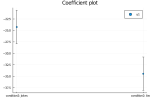

In [76]:
coefplot(m1a)

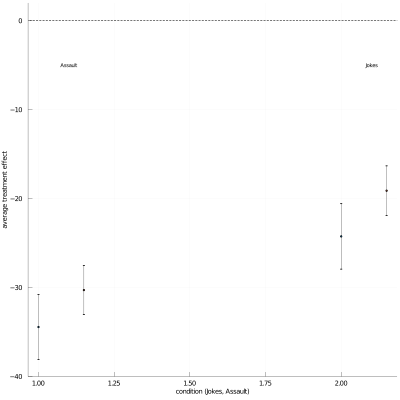

In [77]:
# use int from package MLJBase
plot(int(CategoricalArray(coefdf.name), type=Int), coefdf.coef1, seriestype = :scatter, yerror=1.96*coefdf.err1,
    xtickfontsize=18,
    ytickfontsize=18,
    #xshowaxis=false,
    xlabel="condition (Jokes, Assault)",
    xguidefontsize=18,
    ylim = (-40,2),
    ylabel="average treatment effect",
    yguidefontsize=18,
    legendfontsize=18,
    size=(1600,1600),
        legend=false
       )
plot!(int(CategoricalArray(coefdf.name), type=Int).+.15, coefdf.coef2, seriestype = :scatter, yerror=1.96*coefdf.err2, lw=3
       )
hline!([0], seriestype = "hline", lw=2, ls=:dash, lc="black")
annotate!(1.1, -5, "Assault", :black)
annotate!(2.1, -5, "Jokes", :black)

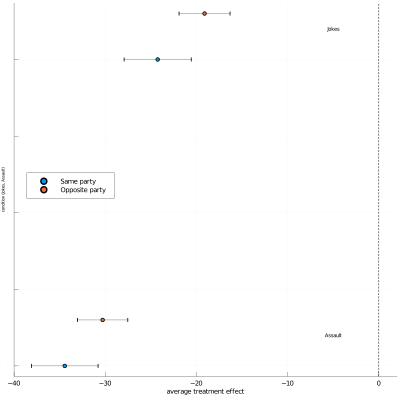

In [78]:
# switch to make horizontal, matching layout in publication
plot(coefdf.coef1, int(CategoricalArray(coefdf.name), type=Int), seriestype = :scatter, xerror=1.96*coefdf.err1,
    markersize=8,
    xtickfontsize=18,
    #ytickfontsize=18,
    #tickfontcolor = false,
    #yshowaxis=false,
    xlabel="average treatment effect",
    xguidefontsize=18,
    xlim = (-40,2),
    ylabel="condition (Jokes, Assault)",
    #yguidefontsize=18,
    label = ("Same party"),
    legendfontsize=18,
    #ytickfontcolor = "white",
    ytickfontsize = 1, # eliminates tick labels
    size=(1600,1600),
    #legend=false,
        legend = :left #:outertopleft
       )
plot!(coefdf.coef2, int(CategoricalArray(coefdf.name), type=Int).+.15, seriestype = :scatter, label = ("Opposite party"), 
            xerror=1.96*coefdf.err2, 
            markersize=8
       )
vline!([0], seriestype = "vline", lw=2, ls=:dash, lc="black", label = false)
annotate!(-5, 1.1, "Assault", :black)
annotate!(-5, 2.1, "Jokes", :black)

In [79]:
savefig("./figures/fig1.png") 

In [80]:
# Figure 2

In [81]:
m2a = lm(@formula(perchange_vote ~ condition2), samepartydat)
m2b = lm(@formula(perchange_vote ~ condition2), opppartydat)
m2a

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

perchange_vote ~ 1 + condition2

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                         Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)            5.72054     1.6092     3.55    0.0004    2.56436    8.87672
condition2: Jokes    -19.1207      2.28271   -8.38    <1e-15  -23.5978   -14.6435
condition2: Assault  -28.0746      2.26418  -12.40    <1e-33  -32.5154   -23.6338
──────────────────────────────────────────────────────────────────────────────────

In [82]:
m2b

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

perchange_vote ~ 1 + condition2

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                         Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)            3.61004     1.33628    2.70    0.0070    0.989138    6.23095
condition2: Jokes    -17.595       1.90162   -9.25    <1e-19  -21.3248    -13.8653
condition2: Assault  -27.849       1.87451  -14.86    <1e-46  -31.5256    -24.1725
───────────────────────────────────────────────────────────────────────────────────

In [83]:
coefdf = DataFrame()
coefdf.name = coefnames(m2a)[2:end] # no intercept
coefdf.nameb = ["Jokes", "Assault"]
coefdf.coef1 = coef(m2a)[2:end]
coefdf.err1 = stderror(m2a)[2:end]
coefdf.upper1 = coefdf.coef1 + 1.96*coefdf.err1
coefdf.lower1 = coefdf.coef1 - 1.96*coefdf.err1
coefdf.coef2 = coef(m2b)[2:end]
coefdf.err2 = stderror(m2b)[2:end]
coefdf.upper2 = coefdf.coef2 + 1.96*coefdf.err2
coefdf.lower2 = coefdf.coef2 - 1.96*coefdf.err2

coefdf

,name,nameb,coef1,err1,upper1,lower1,coef2,err2
,String,String,Float64,Float64,Float64,Float64,Float64,Float64
1,condition2: Jokes,Jokes,-19.1207,2.28271,-14.6465,-23.5948,-17.595,1.90162
2,condition2: Assault,Assault,-28.0746,2.26418,-23.6368,-32.5124,-27.849,1.87451


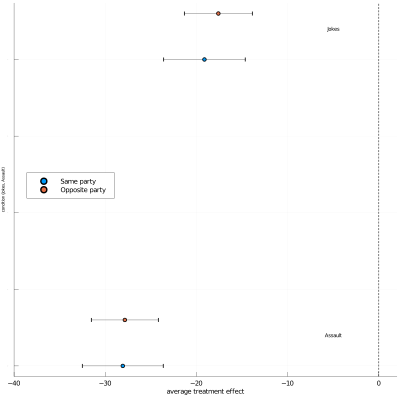

In [84]:
plot(coefdf.coef1, int(CategoricalArray(coefdf.name), type=Int), seriestype = :scatter, xerror=1.96*coefdf.err1,
    markersize=8,
    xtickfontsize=18,
    #ytickfontsize=18,
    #tickfontcolor = false,
    #yshowaxis=false,
    xlabel="average treatment effect",
    xguidefontsize=18,
    xlim = (-40,2),
    ylabel="condition (Jokes, Assault)",
    #yguidefontsize=18,
    label = ("Same party"),
    legendfontsize=18,
    #ytickfontcolor = "white",
    ytickfontsize = 1,
    size=(1600,1600),
    #legend=false,
        legend = :left #:outertopleft
       )
plot!(coefdf.coef2, int(CategoricalArray(coefdf.name), type=Int).+.15, seriestype = :scatter, label = ("Opposite party"), 
            xerror=1.96*coefdf.err2, 
            markersize=8
       )
vline!([0], seriestype = "vline", lw=2, ls=:dash, lc="black", label = false)
annotate!(-5, 1.1, "Assault", :black)
annotate!(-5, 2.1, "Jokes", :black)

In [85]:
savefig("./figures/fig2.png") 

In [86]:
# Figure 3

In [87]:
m3a = lm(@formula(perchange_sexism ~ condition2), samepartydat)
m3b = lm(@formula(perchange_sexism ~ condition2), opppartydat)
m3a

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

perchange_sexism ~ 1 + condition2

Coefficients:
──────────────────────────────────────────────────────────────────────────────────
                         Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────────
(Intercept)          -0.23347      0.41674  -0.56    0.5754  -1.05083     0.583894
condition2: Jokes     1.23334      0.59116   2.09    0.0371   0.0738784   2.3928
condition2: Assault   0.119715     0.58636   0.20    0.8382  -1.03033     1.26976
──────────────────────────────────────────────────────────────────────────────────

In [88]:
m3b

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

perchange_sexism ~ 1 + condition2

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                         Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)          -0.780031    0.416992  -1.87    0.0616  -1.5979    0.0378354
condition2: Jokes     1.93285     0.59341    3.26    0.0011   0.768967  3.09673
condition2: Assault   0.843948    0.584949   1.44    0.1493  -0.303341  1.99124
─────────────────────────────────────────────────────────────────────────────────

In [89]:
# juts need to change first two lines
m1 = m3a
m2 = m3b
#
coefdf = DataFrame()
coefdf.name = coefnames(m1)[2:end] # no intercept
coefdf.nameb = ["Jokes", "Assault"]
coefdf.coef1 = coef(m1)[2:end]
coefdf.err1 = stderror(m1)[2:end]
coefdf.upper1 = coefdf.coef1 + 1.96*coefdf.err1
coefdf.lower1 = coefdf.coef1 - 1.96*coefdf.err1
coefdf.coef2 = coef(m2)[2:end]
coefdf.err2 = stderror(m2)[2:end]
coefdf.upper2 = coefdf.coef2 + 1.96*coefdf.err2
coefdf.lower2 = coefdf.coef2 - 1.96*coefdf.err2

coefdf

,name,nameb,coef1,err1,upper1,lower1,coef2,err2
,String,String,Float64,Float64,Float64,Float64,Float64,Float64
1,condition2: Jokes,Jokes,1.23334,0.59116,2.39201,0.0746641,1.93285,0.59341
2,condition2: Assault,Assault,0.119715,0.58636,1.26898,-1.02955,0.843948,0.584949


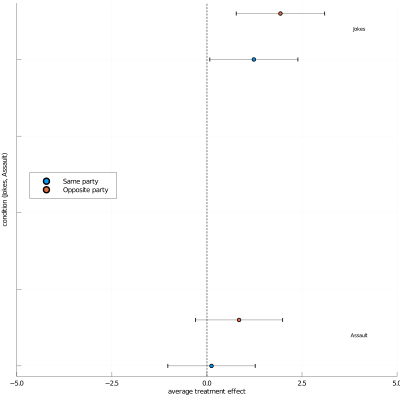

In [90]:
plot(coefdf.coef1, int(CategoricalArray(coefdf.name), type=Int), seriestype = :scatter, xerror=1.96*coefdf.err1,
    markersize=8,
    xtickfontsize=18,
    #ytickfontsize=18,
    #tickfontcolor = false,
    #yshowaxis=false,
    xlabel="average treatment effect",
    xguidefontsize=18,
    xlim = (-5,5),
    ylabel="condition (Jokes, Assault)",
    yguidefontsize=18,
    label = ("Same party"),
    legendfontsize=18,
    #ytickfontcolor = "white",
    ytickfontsize = 1,
    size=(1600,1600),
    #legend=false,
        legend = :left #:outertopleft
       )
plot!(coefdf.coef2, int(CategoricalArray(coefdf.name), type=Int).+.15, seriestype = :scatter, label = ("Opposite party"), 
            xerror=1.96*coefdf.err2, 
            markersize=8
       )
vline!([0], seriestype = "vline", lw=2, ls=:dash, lc="black", label = false)
annotate!(4, 1.1, "Assault", :black)
annotate!(4, 2.1, "Jokes", :black)

In [91]:
savefig("./figures/fig3.png") 

In [92]:
# Figure 4

In [93]:
sametempdf1 = samepartydat[(samepartydat[:condition2] .== "Assault"),:]
sametempdf2 = samepartydat[(samepartydat[:condition2] .== "Jokes"),:]


,id,senator_party,condition,pid7,pre_sexism_1
,Int64,String,Int64,String,String
1,4,Republican,1,Independent,Agree somewhat
2,12,Republican,1,Not very strong Democrat,Agree somewhat
3,13,Republican,1,Independent,Agree somewhat
4,26,Democrat,1,Independent,Agree somewhat
5,32,Democrat,1,Independent,Neither disagree nor agree
6,36,Democrat,1,Strong Republican,Disagree somewhat
7,39,Democrat,1,Independent,Disagree strongly
8,47,Republican,1,Strong Democrat,Disagree strongly
9,50,Republican,1,Independent,Disagree strongly


In [94]:
opptempdf1 = opppartydat[(opppartydat[:condition2] .== "Assault"),:]
opptempdf2 = opppartydat[(opppartydat[:condition2] .== "Jokes"),:]

,id,senator_party,condition,pid7,pre_sexism_1
,Int64,String,Int64,String,String
1,4,Republican,1,Independent,Agree somewhat
2,13,Republican,1,Independent,Agree somewhat
3,14,Republican,1,Not very strong Republican,Agree somewhat
4,26,Democrat,1,Independent,Agree somewhat
5,32,Democrat,1,Independent,Neither disagree nor agree
6,39,Democrat,1,Independent,Disagree strongly
7,50,Republican,1,Independent,Disagree strongly
8,57,Democrat,1,Not very strong Democrat,Neither disagree nor agree
9,60,Democrat,1,Strong Democrat,Disagree strongly


In [95]:
sametempdf1[:mean] = mean(sametempdf1.meanpunishment)
sametempdf1[:err] = std(sametempdf1.meanpunishment)
sametempdf2[:mean] = mean(sametempdf2.meanpunishment)
sametempdf2[:err] = std(sametempdf2.meanpunishment)

0.9963502555338901

In [96]:
opptempdf1[:mean] = mean(opptempdf1.meanpunishment)
opptempdf1[:err] = std(opptempdf1.meanpunishment)
opptempdf2[:mean] = mean(opptempdf2.meanpunishment)
opptempdf2[:err] = std(opptempdf2.meanpunishment)

0.9232510263561144

In [97]:
tempdf1 = DataFrame()
tempdf1[:mean] = [sametempdf1.mean[1], sametempdf2.mean[1]]
tempdf1.condition2 = ["Assault", "Jokes"]
tempdf1.err = [sametempdf1.err[1], sametempdf2.err[1]]
tempdf1

tempdf2 = DataFrame()
tempdf2[:mean] = [opptempdf1.mean[1], opptempdf2.mean[1]]
tempdf2.condition2 = ["Assault", "Jokes"]
tempdf2.err = [opptempdf1.err[1], opptempdf2.err[1]]
tempdf2

,mean,condition2,err
,Float64,String,Float64
1,2.9572,Assault,0.965431
2,2.57271,Jokes,0.923251


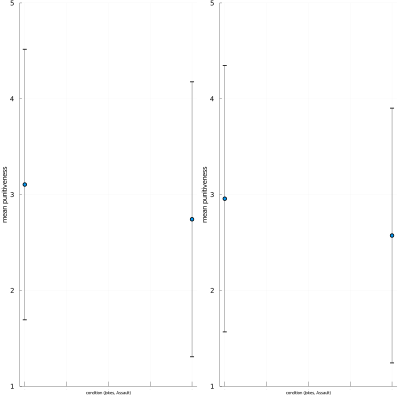

In [98]:
g1 = plot(int(CategoricalArray(tempdf1.condition2), type=Int), tempdf1.mean, seriestype = :scatter, yerror=1.44*tempdf1.err,
        markersize=8,
    ytickfontsize=18,
    #ytickfontsize=18,
    #tickfontcolor = false,
    #yshowaxis=false,
    ylabel="mean punitiveness",
    yguidefontsize=18,
    ylim = (1,5),
    xlabel="condition (Jokes, Assault)",
    #xguidefontsize=18,
    label = ("Same party"),
    legendfontsize=18,
    #ytickfontcolor = "white",
    xtickfontsize = 1,
    size=(1600,1600),
    legend=false
    #legend = :left #:outertopleft,
    )
hline!([0], seriestype = "vline", lw=2, ls=:dash, lc="black", label = false)
#annotate!(4, 1.1, "Assault", :black)
g2 = plot(int(CategoricalArray(tempdf2.condition2), type=Int), tempdf2.mean, seriestype = :scatter, yerror=1.44*tempdf2.err,
         markersize=8,
    ytickfontsize=18,
    #ytickfontsize=18,
    #tickfontcolor = false,
    #yshowaxis=false,
    ylabel="mean punitiveness",
    yguidefontsize=18,
    ylim = (1,5),
    xlabel="condition (Jokes, Assault)",
    #xguidefontsize=18,
    label = ("Same party"),
    legendfontsize=18,
    #ytickfontcolor = "white",
    xtickfontsize = 1,
    size=(1600,1600),
    legend=false
    #    legend = :left #:outertopleft
    )
hline!([0], seriestype = "vline", lw=2, ls=:dash, lc="black", label = false)
#annotate!(4, 1.1, "Assault", :black)
plot(g1, g2)

# l = @layout [a ; b c]
        

In [99]:
savefig("./figures/fig4.png") 

In [100]:
#using JLD
#@save "./data/working/working.jld"

In [101]:
# use julia's plotting logic to plot two graphs side by side

In [102]:
# Figure 5


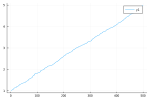

In [169]:
# desccribe(df1.pre_sexism)
# pre_sexism ranges from 1-5 and increases in small increments
# so draw random sample of 500 obs from uniform distribution between 1-5
MVZ = rand((1: 0.001 :5),500) # make sure 0 appears before decimal, otherwise decimal is broadcasting syntax in julia
MVZ = sort(MVZ)
plot(MVZ)

In [170]:
m5  = lm(@formula(perchange_favorability ~ condition2 + pre_sexism + condition2*pre_sexism), df1)
m5

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

perchange_favorability ~ 1 + condition2 + pre_sexism + condition2 & pre_sexism

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────────────
                                       Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                         5.36958     2.32492     2.31    0.0210    0.810856    9.92831
condition2: Jokes                 -41.0726      3.3006    -12.44    <1e-33  -47.5445    -34.6007
condition2: Assault               -65.4236      3.30862   -19.77    <1e-80  -71.9112    -58.936
pre_sexism                         -0.740512    0.897954   -0.82    0.4096   -2.50123     1.02021
condition2: Jokes & pre_sexism      7.73726     1.279

In [172]:
m5  = lm(@formula(perchange_favorability ~ condition2 + pre_sexism + condition2*pre_sexism), df1)
# put the in dataframe and add other vars
intdf = DataFrame()
intdf[:MVZ] = MVZ
intdf[:b1] = coef(m5)[2]
intdf[:b2] = coef(m5)[3]
intdf[:b4] = coef(m5)[5]
intdf[:b5] = coef(m5)[6]
# model matrix is:
mm = modelmatrix(ModelFrame(@formula(perchange_favorability ~ condition2 + pre_sexism + condition2*pre_sexism), df1))
# modelmatrix (lowercase) is from pkg StatsModels
# could also use ModelMatrix from pkg DataFrames, but them matrix is indexed within object mm
# to get model matrix, need to call mm.m
# to see object properties, use propertynames(mm)
#var-cov matrix is:
varcovm5 = cov(mm)
# if used ModelMatrix instead of modelmatrix, change this to:
# cov(mm.m)
#varcovm5
intdf[:varb1] = varcovm5[1,1]
intdf[:varb2] = varcovm5[2,2]
intdf[:varb4] = varcovm5[4,4]
intdf[:varb5] = varcovm5[5,5]
intdf[:covb1b4] =  varcovm5[1,4]
intdf[:covb2b5] =  varcovm5[2,5]
intdf

,MVZ,b1,b2,b4,b5,varb1,varb2,varb4,varb5
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1.023,-41.0726,-65.4236,7.73726,13.1697,0.0,0.220203,1.02832,1.56475
2,1.023,-41.0726,-65.4236,7.73726,13.1697,0.0,0.220203,1.02832,1.56475
3,1.026,-41.0726,-65.4236,7.73726,13.1697,0.0,0.220203,1.02832,1.56475
4,1.032,-41.0726,-65.4236,7.73726,13.1697,0.0,0.220203,1.02832,1.56475
5,1.043,-41.0726,-65.4236,7.73726,13.1697,0.0,0.220203,1.02832,1.56475
6,1.043,-41.0726,-65.4236,7.73726,13.1697,0.0,0.220203,1.02832,1.56475
7,1.045,-41.0726,-65.4236,7.73726,13.1697,0.0,0.220203,1.02832,1.56475
8,1.052,-41.0726,-65.4236,7.73726,13.1697,0.0,0.220203,1.02832,1.56475
9,1.069,-41.0726,-65.4236,7.73726,13.1697,0.0,0.220203,1.02832,1.56475


In [175]:
intdf[:conbx1]=intdf.b1+(intdf.b4.*intdf.MVZ) # remember decimal ahead of * for element-wise operation on array
intdf[:consx1]=(intdf.varb1+(intdf.varb4.*(intdf.MVZ.^2))+ (2 .*intdf.covb1b4.*intdf.MVZ)).^.5 # 
intdf[:err1]=1.96.*intdf.consx1
intdf[:upperx1]=intdf.conbx1+intdf.err1
intdf[:lowerx1]=intdf.conbx1-intdf.err1 # 

intdf[:conbx2]=intdf.b2+(intdf.b5.*intdf.MVZ)
intdf[:consx2]=(intdf.varb2+(intdf.varb5.*(intdf.MVZ.^2))+ (2 .*intdf.covb2b5.*intdf.MVZ)).^.5 # 
intdf[:err2]=1.96.*intdf.consx2
intdf[:upperx2]=intdf.conbx2+intdf.err2
intdf[:lowerx2]=intdf.conbx2-intdf.err2 # 
intdf[1:5,20:21]

,upperx2,lowerx2
,Float64,Float64
1,-48.6003,-55.3016
2,-48.6003,-55.3016
3,-48.5535,-55.2694
4,-48.4599,-55.205
5,-48.2882,-55.0869


(500, 21)

In [106]:
# Figure 6

In [107]:
# Figure 7

In [108]:
# diagnostics

In [109]:
#using StatPlots, Plots

In [110]:
#@df df2 corrplot([:condition2 :pre_sexism :meanpunishment :post_vote], grid = false)